# Solution creater template 

This notebook assumes that https://co2020-ba-vu.challenges.ortec.com/zips/Validator.zip has been unpacked to a subdirectory of the current directory called `ParticipantsSuite`, changes to a different location are obvious. 

It also assumes a subdirectory `instances` containing the instance files. 

In [57]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append('./ParticipantsSuite')

from InstanceCVRPTWUI import InstanceCVRPTWUI
instance = InstanceCVRPTWUI('instances/co2020_challenge_r100d10_1.txt')

In [58]:
if instance.isValid():
    instance.calculateDistances()
    import numpy
    nLoc = len(instance.Coordinates)
    d_df = pd.DataFrame([ [ instance.calcDistance[i][j] for j in range(nLoc) ] for i in range(nLoc) ])

t_df = pd.DataFrame([(i.ID, i.weight, i.amount, i.cost) for i in instance.Tools], columns=['ID','weight','amount','cost']).set_index('ID')
r_df = pd.DataFrame([(i.ID, i.node, i.fromDay, i.toDay, i.numDays, i.tool, i.toolCount) for i in instance.Requests], columns=['ID','node','fromDay','toDay','numDays','tool','toolCount']).set_index('ID')
c_df = pd.DataFrame([(i.ID, i.X, i.Y) for i in instance.Coordinates], columns=['ID','X','Y']).set_index('ID')

## List of DataFrames with data:

Tools: `t_df`, Requests: `r_df`, Coordinates: `c_df`, Distances: `d_df`

In [60]:
r_df_m = r_df.merge(c_df, left_on='node', right_index=True)
r_df_m = r_df_m.merge(t_df, left_on='tool', right_index=True)
r_df_m['size'] = r_df_m.toolCount * r_df_m.weight

r_df_pickupDay = r_df_m.copy()
r_df_fromDay = r_df_m.copy()

r_df_pickupDay['pickupDay'] = r_df_pickupDay.fromDay + r_df_pickupDay.numDays
r_df_fromDay.drop(columns=['toDay','numDays'], axis=1, inplace=True)
r_df_pickupDay.drop(columns=['fromDay','toDay','numDays'], axis=1, inplace=True)

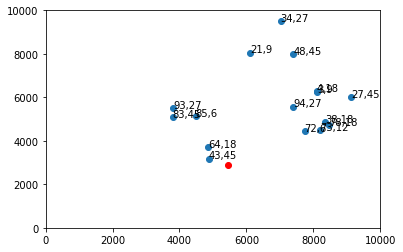

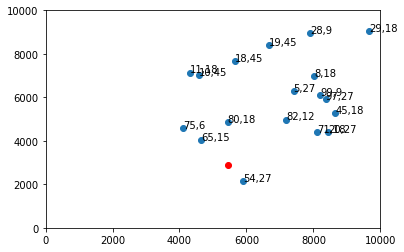

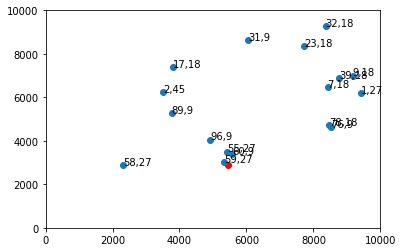

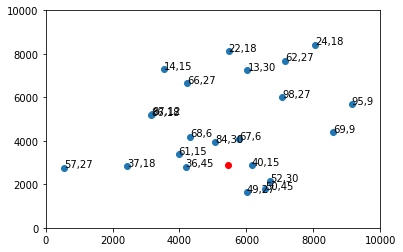

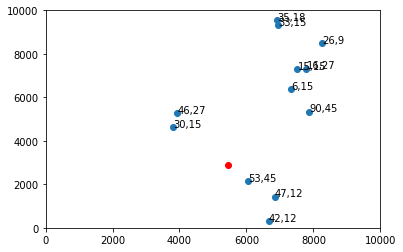

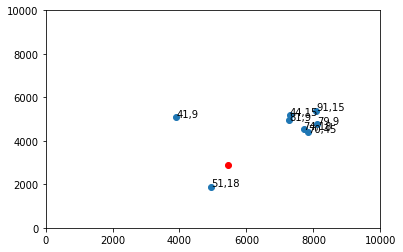

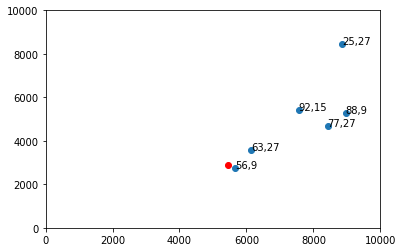

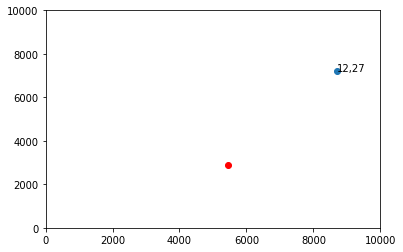

In [69]:
for i in range(r_df_fromDay['fromDay'].max()):
    day = r_df_fromDay[r_df_fromDay['fromDay']==(i+1)]
    day_copy = day.copy()

    fig=plt.figure()
    ax=fig.subplots()
    ax.scatter(c_df[c_df.index==0].X, c_df[c_df.index==0].Y, color='r')
    ax.scatter(day.X, day.Y)
    ax.set_ylim((0,10000))
    ax.set_xlim((0,10000))

    for index, row in day_copy.iterrows():
        txt = str(row['node']) + ',' + str(row['size'])
        xy = (row.X, row.Y)
        ax.annotate(txt,xy)

    fig.show()

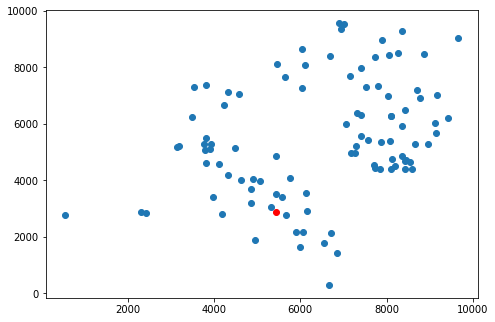

In [173]:
# All locations + depot
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(c_df.iloc[0:1].X, c_df.iloc[0:1].Y, color='r')
ax.scatter(c_df.iloc[1:99].X, c_df.iloc[1:99].Y)
plt.show()